In [2]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebval

## Theory of Chebyshev Polynomials

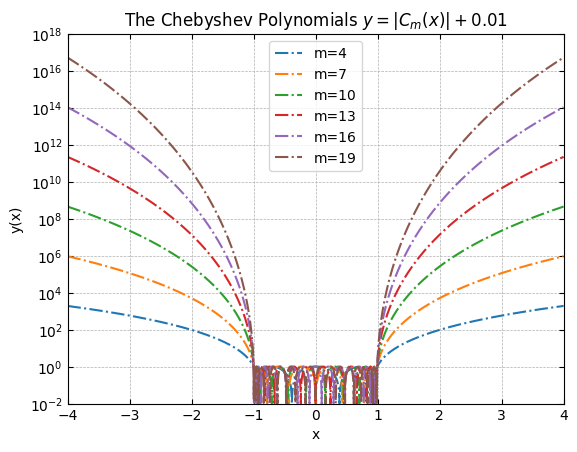

In [81]:
#Create an array from -2 to 2 with 1000 points
x = np.linspace(-4, 4, 100000)

#Write a code for finding m the first kind chebyshev polynomial
m = 20
T = np.zeros((m, x.size))
T[0] = np.ones(x.size)
T[1] = x
C=np.zeros((m, x.size))
for i in range(2, m):
    T[i] = 2*x*T[i-1] - T[i-2] + 0.01

for i in range (m):
    C[i] = np.abs(T[i])+0.01

#Plot the first kind chebyshev polynomial
plt.figure()
for i in range(4,m,3):
    plt.plot(x, C[i], label="m={}".format(i), linestyle="-.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y(x)")
# y range from 10^-2 to 10^18
plt.ylim(1e-2, 1e18)
plt.xlim(-4, 4)
#y in semi log
plt.yscale("log")
# show ticks on both sides
plt.tick_params(axis='both', direction='in')
# Show ticks on right as well as top
plt.tick_params(top=True, right=True)
# Add labels on y axis after 10^2
plt.yticks([1e-2, 1e0, 1e2, 1e4, 1e6, 1e8, 1e10, 1e12, 1e14, 1e16, 1e18], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^{6}$", "$10^{8}$", "$10^{10}$", "$10^{12}$", "$10^{14}$", "$10^{16}$", "$10^{18}$"])

plt.title("The Chebyshev Polynomials $y = |C_m(x)|+0.01$")
plt.grid( linestyle='--', linewidth=0.5)
plt.show()


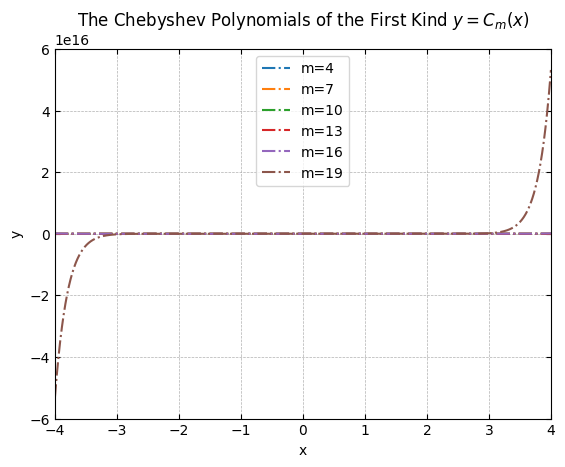

In [82]:
plt.figure()
for i in range(4,m,3):
    plt.plot(x, T[i], label="m={}".format(i), linestyle="-.")
plt.legend( loc='upper center')
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(axis='both', direction='in')
plt.tick_params(top=True, right=True)
plt.title("The Chebyshev Polynomials of the First Kind $y=C_m(x)$")
plt.xlim(-4,4)
plt.ylim(-6e16,6e16)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## The condition number problem!!

In [5]:
# Condition number of the matrices calculated using the integeration between -1 to 1, shows chebyshev polynomials are better conditioned.

A = [[2,0,2/3,0],[0,2/3,0,2/5],[2/3,0,2/5,0],[0,2/5,0,2/7]]
B = [[2,0,-2/3,0],[0,2/3,0,-2/5],[-2/3,0,14/5,0],[0,-2/5,0,34/35]]

print(np.linalg.cond(A))
print(np.linalg.cond(B))

67.60438965209266
8.126380047380946


In [6]:
def condition_number(n, N):
    
    # Create a random symmetric matrix of size n x n
    H = np.random.randn(n, n) + 1j*np.random.randn(n, n)
    H = 0.5 * (H + H.conj().T)  # Ensuring symmetry
    cond_H = np.linalg.cond(H)

    # Create a random matrix of size n x N
    A = np.random.randn(n, N) + 1j*np.random.randn(n, N)
    cond_A = np.linalg.cond(A)

    # # Compute the minimum eigenvalue of H
    # a_L = np.min(np.abs(np.linalg.eigvalsh(H)))

    # Create a random vector of size n x 1
    b = np.random.randn(n, 1) + 1j*np.random.randn(n, 1)

    # Compute Chebyshev polynomials iteratively
    B = np.empty((n, N), dtype=np.complex128)
    B[:, 0] = (b).flatten()

    if N > 1:
        B[:, 1] = (H @ b).flatten()

    # T_k_prev = 1
    # T_k_curr = a_L
    T_prev = np.eye(n)  # T_0 = I
    T_curr = H          # T_1 = H

    for i in range(2, N):
        T_next = 2 * H @ T_curr - T_prev
        # T_k_next = 2 * a_L * T_k_curr - T_k_prev
        B[:, i] = (T_next@ b).flatten()
        T_prev, T_curr = T_curr, T_next  # Move forward in recurrence
        # T_k_prev, T_k_curr = T_k_curr, T_k_next

    cond_B = np.linalg.cond(B)

    # Compute power-based matrix `C` iteratively
    C = np.empty((n, N),dtype=np.complex128)
    C[:, 0] = b.flatten()
    for i in range(1, N):
        C[:, i] = (H @ C[:, i - 1]).flatten()  # Avoid unnecessary slicing

    cond_C = np.linalg.cond(C)

    return cond_H, cond_A, cond_B, cond_C


In [7]:
n=[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
N=10
cond_H=[]
cond_A=[]
cond_B=[]
cond_C=[]
for i in n:
    a,b,c,d=condition_number(i,N)
    cond_H.append(a)
    cond_A.append(b)
    cond_B.append(c)
    cond_C.append(d)
    

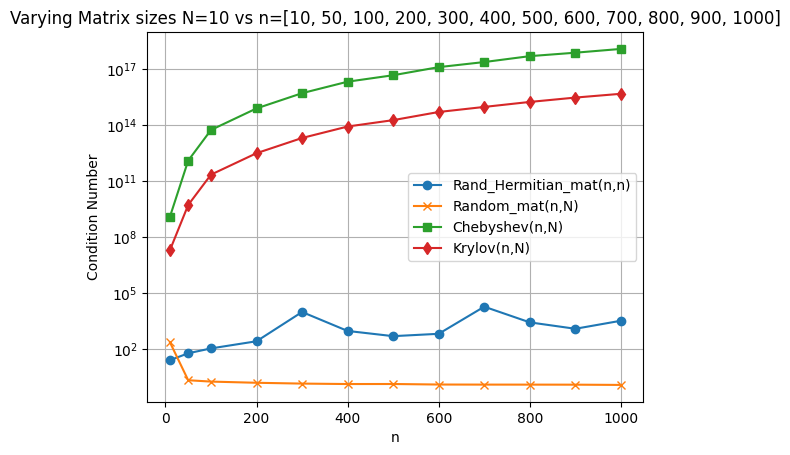

In [8]:
# Plot
plt.figure()
plt.plot(n, cond_H, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(n, cond_A, label="Random_mat(n,N)", marker="x")
plt.plot(n, cond_B, label="Chebyshev(n,N)", marker="s")
plt.plot(n, cond_C, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.title(f"Varying Matrix sizes {N=} vs {n=}", fontsize=12)
plt.grid()
plt.show()

In [9]:
n=100
N=[5, 10, 15, 20 ,25, 30, 35, 50]
cond_H_=[]
cond_A_=[]
cond_B_=[]
cond_C_=[]
for i in N:
    a,b,c,d = condition_number(n,i)
    cond_H_.append(a)
    cond_A_.append(b)
    cond_B_.append(c)
    cond_C_.append(d)

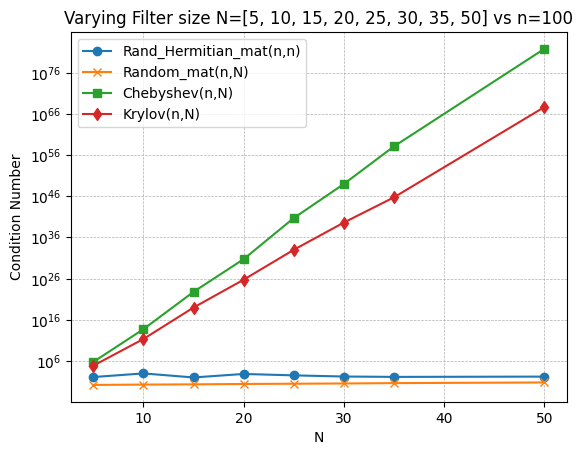

In [10]:
#Plot
plt.figure()
plt.plot(N, cond_H_, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(N, cond_A_, label="Random_mat(n,N)", marker="x")
plt.plot(N, cond_B_, label="Chebyshev(n,N)", marker="s")
plt.plot(N, cond_C_, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Condition Number")
plt.title(f"Varying Filter size {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## Comparison of Cholesky Factorization, Diagonalization and Hybrid Methods for Solving EVP

In [34]:
def lookup(b):
    if b <=500:
        return 24
    elif b<=750:
        return 30
    elif b<=1000:
        return 39
    elif b<=1500:
        return 50
    elif b<=2000:
        return 53
    elif b<=3000:
        return 57
    elif b<=4000:
        return 62
    elif b<=5000:
        return 69
    elif b<=9000:
        return 77
    elif b<=14000:
        return 104
    elif b<=20000:
        return 119
    elif b<=30000:
        return 162
    elif b<=50000:
        return 300
    elif b<=80000:
        return 450
    elif b<=100000:
        return 550
    elif b<=200000:
        return 700
    elif b<=500000:
        return 1000

In [55]:
# Generate a Real Symmetric Matrix
def generate_hermitian_matrix(M):
    """Generates an M x M random Hermitian matrix."""
    # H = np.random.randn(M, M) + 1j * np.random.randn(M, M)
    # H = 0.5 * (H + H.conj().T)  # Ensure Hermitian


    # Generate a synthetic matrix H_ij = exp(-0.5 *|i-j|) * sin(i+1)
    i, j = np.meshgrid(np.arange(M), np.arange(M), indexing="ij")
    H = np.exp(-0.5 * np.abs(i - j)) * np.sin(i + j)
    # H[np.abs(H) < 1e-5] = 0  # Set small values to zero
    return H

def Chebyshev_poly(H, a, b, k):
    """Computes the k-th order Chebyshev polynomial T_k(H)."""
    M = H.shape[0]
    H = (H - ((a + b) / 2) * np.eye(M)) / ((b - a) / 2)  # Normalize eigenvalues

    T_curr = np.eye(M)  
    T_next = H.copy()  # Avoid aliasing

    for _ in range(2, k + 1):
        T_new = 2 * H @ T_next - T_curr
        T_curr, T_next = T_next, T_new  # Efficient swapping

    return T_next

def Chebyshev_scalar_poly(x, a, b, k):
    """Computes the k-th order Chebyshev polynomial T_k(x)."""
    coeffs = np.zeros(k + 1)
    coeffs[k] = 1  # Set T_k coefficient to 1
    return chebval((x-((a+b)/2))/((b-a)/2), coeffs)

## Method 1: Cholesky Factorization

In [56]:
def ChFSI_cholalgo(H, Psi, T_kH):
        
        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F

        # Regularization to ensure positive definiteness
        # S += np.eye(S.shape[0]) * 1e-10
 
        #Cholesky decomposition
        L = np.linalg.cholesky(S)
        
        # orthogonalization
        Psi = Psi_F @ (np.linalg.inv(L).conj().T)
        
        eigenvals = np.einsum('ji,jk,ki->i', Psi.conj(), H, Psi)
        eigenvecs = Psi

        idx = np.argsort(eigenvals)
        eigenvals = eigenvals[idx]
        eigenvecs = eigenvecs[:,idx]

        return eigenvals, eigenvecs


def ChFSI_chol(Psi, H, k = 24, Ntilde = 10, buffer = 20, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian Matrix
    # N is the number of eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    #Initializing matrices and variables
    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)

    eigenvalsh = np.linalg.eigvalsh(H)
    a_0, b = np.min(eigenvalsh), np.max(eigenvalsh)

    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    T_kH = Chebyshev_poly(H,a,b,k) / Chebyshev_scalar_poly(a_L, a, b, k)

    print()
    print("ChFSI with Cholesky Decomposition Parameters")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print(f"Degree of Chebyshev Polynomial: {k}")
    print(f"Upper bound of Spectrum b = ", b)
    print(f"Lower bound of Spectrum a_0 = ", a_0)
    print(F"Initial guess of Lower bound of wanted spectrum a = ", a)
    print(f"a_L = ", a_L)
    print()

    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:

        eigenvals, eigenvecs = ChFSI_cholalgo(H, Psi, T_kH)
        Psi = eigenvecs

        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))

        a = np.max(eigenvals)
        T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)
        itr+=1

    return eigenvals, eigenvecs, itr, residual

## Method 2: Eigenvalue Decomposition

In [57]:
def generalized_eigenproblem(H, S):
    """ Solves the generalized eigenvalue problem H X = S X Lambda """

    # # Regularization to make S positive definite
    # S += np.eye(S.shape[0]) * 1e-10

    # Cholesky decomposition of S (S = L L^T)
    L = np.linalg.cholesky(S)
    
    # Transform H to standard eigenvalue problem
    Linv = np.linalg.inv(L)
    H_tilde = Linv @ H @ Linv.conj().T  # Equivalent to L^{-1} H L^{-dag}

    # Solve standard eigenvalue problem
    eigenvals, Q = np.linalg.eigh(H_tilde)

    # Recover original eigenvectors
    eigenvecs = np.linalg.inv(L.conj().T) @ Q

    return eigenvals, eigenvecs

def ChFSI_diagalgo(H, Psi, T_kH):

        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Projected Matrix
        H_proj = Psi_F.conj().T @ H @ Psi_F

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F
        
        # Diagonalization
        eigenvals, eigvecs = generalized_eigenproblem(H_proj, S)
  
        # orthogonalization
        Psi = Psi_F @ eigvecs

        idx = np.argsort(eigenvals)
        eigenvals = eigenvals[idx]
        eigenvecs = Psi[:,idx]

        return eigenvals, eigenvecs


def ChFSI_diag(Psi, H, k = 24, Ntilde = 10, buffer = 20, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found

    # Print Rank of Psi Matrix
    # print(f"Rank of Psi Matrix: {np.linalg.matrix_rank(Psi)}")

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)
    
    eigenvalsh = np.linalg.eigvalsh(H)
    a_0, b = np.min(eigenvalsh), np.max(eigenvalsh)

    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)

    print()
    print("ChFSI with Diagonalization Parameters")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print(f"Degree of Chebyshev Polynomial: {k}")
    print(f"Upper bound of Spectrum b = ", b)
    print(f"Lower bound of Spectrum a_0 = ", a_0)
    print(F"Initial guess of Lower bound of wanted spectrum a = ", a)
    print(f"a_L = ", a_L)
    print()

    
    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:

        eigenvals, eigenvecs = ChFSI_diagalgo(H, Psi, T_kH)

        Psi = eigenvecs

        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))

        a = np.max(eigenvals)
        T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)
        itr+=1

    return eigenvals, eigenvecs, itr, residual

## Method 3: Hybrid Method

In [58]:
def ChFSI_hybd(Psi, H, k = 24, Ntilde = 10, buffer = 20, l = 10, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter
    # a is the period of algorithm to be used

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    #Initializing matrices and variables
    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)
    
    eigenvalsh = np.linalg.eigvalsh(H)
    a_0, b = np.min(eigenvalsh), np.max(eigenvalsh)

    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)

    print()
    print("ChFSI with Hybrid Method Parameters")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print(f"Degree of Chebyshev Polynomial: {k}")
    print(f"Upper bound of Spectrum b = ", b)
    print(f"Lower bound of Spectrum a_0 = ", a_0)
    print(F"Initial guess of Lower bound of wanted spectrum a = ", a)
    print(f"a_L = ", a_L)
    print("The period of algorithm is ", l)
    print()

    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:
        
        if (((itr % l) == 0) or ((itr+1)==max_iter)) and (itr!=0):
            eigenvals, eigenvecs = ChFSI_diagalgo(H, Psi, T_kH)
        else:
            eigenvals, eigenvecs = ChFSI_cholalgo(H, Psi,T_kH)
            
        Psi = eigenvecs
        
        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))

        a = np.max(eigenvals)
        T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)
        itr+=1

    return eigenvals, eigenvecs, itr, residual

## Method 4: Quantum Imaginary Time Evolution

In [59]:
def QITE_diag(Psi, H, Ntilde = 10, buffer = 20, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found

    # Print Rank of Psi Matrix
    # print(f"Rank of Psi Matrix: {np.linalg.matrix_rank(Psi)}")

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    eigenvalsh = np.sort(np.linalg.eigvalsh(H))
    deltaEL = np.abs(eigenvalsh[Ntilde-1] - eigenvalsh[0])
    tau = np.pi/deltaEL
    exp_H = expm(-H*tau)

    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)

    print()
    print("Quantum Imaginary Time Evolution Diagonalization Parameters")
    print(f"Dimension of H matrix: {M}")
    print(f"Space Size: {N}")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print()

    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:

        eigenvals, eigenvecs = ChFSI_diagalgo(H, Psi,exp_H)

        Psi = eigenvecs

        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))
        
        itr+=1

    return eigenvals, eigenvecs, itr, residual

In [60]:
def QITE_chol(Psi, H, Ntilde = 10, buffer = 20, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found

    # Print Rank of Psi Matrix
    # print(f"Rank of Psi Matrix: {np.linalg.matrix_rank(Psi)}")

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    eigenvalsh = np.sort(np.linalg.eigvalsh(H))
    deltaEL = np.abs(eigenvalsh[Ntilde-1] - eigenvalsh[0])
    tau = np.pi/deltaEL
    exp_H = expm(-H*tau)

    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)

    print()
    print("Quantum Imaginary Diagonalization Cholesky Parameters")
    print(f"Dimension of H matrix: {M}")
    print(f"Space Size: {N}")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print()

    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:

        eigenvals, eigenvecs = ChFSI_cholalgo(H, Psi,exp_H)
        Psi = eigenvecs

        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))
        
        itr+=1

    return eigenvals, eigenvecs, itr, residual

In [61]:
def QITE_hybd(Psi, H, Ntilde = 10, buffer = 20, l = 10, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter
    # a is the period of algorithm to be used

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    eigenvalsh = np.sort(np.linalg.eigvalsh(H))
    deltaEL = np.abs(eigenvalsh[Ntilde-1] - eigenvalsh[0])
    tau = np.pi/deltaEL
    exp_H = expm(-H*tau)

    #Initializing matrices and variables
    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)

    print()
    print("QITE with Hybrid Method Parameters")
    print(f"Dimension of H matrix: {M}")
    print(f"Space Size: {N}")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print()

    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:
        
        if (((itr % l) == 0) or ((itr+1)==max_iter)) and (itr!=0):
            eigenvals, eigenvecs = ChFSI_diagalgo(H, Psi, exp_H)
        else:
            eigenvals, eigenvecs = ChFSI_cholalgo(H, Psi,exp_H)
            
        Psi = eigenvecs
        
        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))

        itr+=1

    return eigenvals, eigenvecs, itr, residual

In [ ]:
def Cheby_krylov_diag(H, v_0, k = 24, Ntilde = 10, buffer = 20, epsilon = 1e-16, max_iter = 100):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found

    # Print Rank of Psi Matrix
    # print(f"Rank of Psi Matrix: {np.linalg.matrix_rank(Psi)}")

    # M is the dimension of H matrix
    M = H.shape[0]
    N = int((1+(buffer/100)) * Ntilde)

    itr=0
    residual = [1e16]
    eigenvals = np.empty((N),dtype=complex)
    eigenvecs = np.empty((M,N),dtype=complex)
    
    eigenvalsh = np.linalg.eigvalsh(H)
    a_0, b = np.min(eigenvalsh), np.max(eigenvalsh)

    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)

    # Compute Chebyshev polynomials iteratively
    Psi = np.empty((M, N), dtype=np.complex128)
    Psi[:, 0] = (b).flatten()

    if N > 1:
        Psi[:, 1] = (H/a_L @ b).flatten()

    T_k_prev = 1
    T_k_curr = a_L
    T_prev = np.eye(n)  # T_0 = I
    T_curr = H/a_L          # T_1 = H

    for i in range(2, N):
        T_next = 2 * H/a_L @ T_curr - T_prev
        # T_k_next = 2 * a_L * T_k_curr - T_k_prev
        B[:, i] = (T_next@ b).flatten()
        T_prev, T_curr = T_curr, T_next  # Move forward in recurrence
        # T_k_prev, T_k_curr = T_k_curr, T_k_next

    print()
    print("ChFSI with Diagonalization Parameters")
    print(f"Number of Eigenvalues: {Ntilde}")
    print(f"Buffer: {buffer}%")
    print(f"Convergence Threshold: {epsilon}")
    print(f"Max Iterations: {max_iter}")
    print(f"Degree of Chebyshev Polynomial: {k}")
    print(f"Upper bound of Spectrum b = ", b)
    print(f"Lower bound of Spectrum a_0 = ", a_0)
    print(F"Initial guess of Lower bound of wanted spectrum a = ", a)
    print(f"a_L = ", a_L)
    print()

    
    # Algorithm
    while itr < max_iter and residual[itr] >= epsilon:

        eigenvals, eigenvecs = ChFSI_diagalgo(H, Psi, T_kH)

        Psi = eigenvecs

        residual.append(np.max(np.linalg.norm(H @ eigenvecs[:,:Ntilde] - eigenvecs[:,:Ntilde] @ np.diag(eigenvals[:Ntilde]), axis=0, ord=2)))

        a = np.max(eigenvals)
        T_kH = Chebyshev_poly(H, a, b, k) / Chebyshev_scalar_poly(a_L, a, b, k)
        itr+=1

    return eigenvals, eigenvecs, itr, residual

In [62]:
# Parameters
M =  100 # Dimension of the matrix
Ntilde = 10  # Number of eigenvalues
buffer = 20  # Buffer for the number of eigenvalues
N = int((1+(buffer/100)) * Ntilde)  # Number of eigenvalues to be found
Psi = np.random.randn(M, N) + 1j * np.random.randn(M,N)
b = np.random.randn(n, 1) + 1j*np.random.randn(n, 1)
k = 24  # Degree of Chebyshev polynomial
epsilon = 1e-12  # Tolerance for convergence
max_iter = 100 # Maximum number of iterations
l = 5 # Period of the algorithm for Hybrid Algorithm
H = generate_hermitian_matrix(M)

print("Matrix Size: ", M)
print("Number of Eigenvalues: ", Ntilde)
print("Buffer: ", buffer)
print("Initial space size: ", N)
print("Degree of Chebyshev Polynomial: ", k)
print("Convergence Threshold: ", epsilon)
print("Max Iterations: ", max_iter)
print("Period of Algorithm: ", l)

Matrix Size:  100
Number of Eigenvalues:  10
Buffer:  20
Initial space size:  12
Degree of Chebyshev Polynomial:  24
Convergence Threshold:  1e-12
Max Iterations:  100
Period of Algorithm:  5


In [63]:
# Solving the problem
eigenvals_chol, eigenvecs_chol, itr_chol, residual_chol = ChFSI_chol(Psi, H, k, Ntilde, buffer, epsilon, max_iter)
eigenvals_diag, eigenvecs_diag, itr_diag, residual_diag = ChFSI_diag(Psi, H, k, Ntilde, buffer, epsilon, max_iter)
eigenvals_hybd, eigenvecs_hybd, itr_hybd, residual_hybd = ChFSI_hybd(Psi, H, k, Ntilde, buffer, l, epsilon, max_iter)
eigenvals_qitediag, eigenvecs_qitediag, itr_qitediag, residual_qitediag = QITE_diag(Psi, H, Ntilde, buffer, epsilon, max_iter)
eigenvals_qitechol, eigenvecs_qitechol, itr_qitechol, residual_qitechol = QITE_chol(Psi, H, Ntilde, buffer, epsilon, max_iter)
eigenvals_qitehybd, eigenvecs_qitehybd, itr_qitehybd, residual_qitehybd = QITE_hybd(Psi, H, Ntilde, buffer, l, epsilon, max_iter)
eigenvals, eigenvecs = np.linalg.eigh(H)


ChFSI with Cholesky Decomposition Parameters
Number of Eigenvalues: 10
Buffer: 20%
Convergence Threshold: 1e-12
Max Iterations: 100
Degree of Chebyshev Polynomial: 24
Upper bound of Spectrum b =  2.048426473105496
Lower bound of Spectrum a_0 =  -2.04824635476658
Initial guess of Lower bound of wanted spectrum a =  -1.5566456154219308
a_L =  -2.04824635476658


ChFSI with Diagonalization Parameters
Number of Eigenvalues: 10
Buffer: 20%
Convergence Threshold: 1e-12
Max Iterations: 100
Degree of Chebyshev Polynomial: 24
Upper bound of Spectrum b =  2.048426473105496
Lower bound of Spectrum a_0 =  -2.04824635476658
Initial guess of Lower bound of wanted spectrum a =  -1.5566456154219308
a_L =  -2.04824635476658


ChFSI with Hybrid Method Parameters
Number of Eigenvalues: 10
Buffer: 20%
Convergence Threshold: 1e-12
Max Iterations: 100
Degree of Chebyshev Polynomial: 24
Upper bound of Spectrum b =  2.048426473105496
Lower bound of Spectrum a_0 =  -2.04824635476658
Initial guess of Lower bou

In [3]:
# Plot the error
plt.figure(figsize=(7, 5))
plt.title(f"Residual vs Iteration (M={M}, k={k}, Ntilde={Ntilde}, buffer={buffer},  l={l}, ε={epsilon:.1e}, max_iter={max_iter})")

plt.plot(np.arange(len(residual_chol)-1), residual_chol[1:], marker='s',  label="ChFSI_CD (RAND_INIT)",color="green")
plt.plot(np.arange(len(residual_diag)-1), residual_diag[1:], marker='o',  label="ChFSI_Diag (RAND_INIT)", color="red")
plt.plot(np.arange(len(residual_hybd)-1), residual_hybd[1:], marker='^',  label="ChFSI_Hybd (RAND_INIT)",color="blue")
plt.plot(np.arange(len(residual_qitediag)-1), residual_qitediag[1:], marker='x',  label="QITE_Diag (RAND_INIT)", color="orange")
plt.plot(np.arange(len(residual_qitechol)-1), residual_qitechol[1:], marker='d',  label="QITE_CD (RAND_INIT)", color="purple")
plt.plot(np.arange(len(residual_qitehybd)-1), residual_qitehybd[1:], marker='p',  label="QITE_Hybd (RAND_INIT)", color="brown")

plt.yscale("log")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Residual", fontsize=12)
# Legend adjustments
plt.legend()
plt.show()

NameError: name 'M' is not defined

<Figure size 700x500 with 0 Axes>

In [ ]:
print("Eigenvalues (Cholesky):", eigenvals_chol)
print("Eigenvalues (Diagonalization):", eigenvals_diag)
print("Eigenvalues (Hybrid):", eigenvals_hybd)
print("Eigenvalues (QITE):", eigenvals_qitediag)
print("Eigenvalues (QITE Cholesky):", eigenvals_qitechol)
print("Eigenvalues (QITE Hybrid):", eigenvals_qitehybd)
print("Eigenvalues (Exact):", eigenvals)

Eigenvalues (Cholesky): [-2.04824635+7.03333063e-19j -2.02676917-2.23148204e-19j
 -1.99215613+8.37985511e-19j -1.94685681+1.45747788e-17j
 -1.88145282+2.86799792e-18j -1.81951098+5.27879727e-18j
 -1.74862263+2.45306525e-18j -1.67325141+2.74061788e-18j
 -1.59543516+1.36385873e-17j -1.5172208 -1.17319862e-18j
 -1.43954687-1.67411607e-18j -1.36372935+3.13816443e-18j]
Eigenvalues (Diagonalization): [-2.04824635 -2.02676916 -1.99215613 -1.94685681 -1.88145282 -1.81951098
 -1.74862263 -1.67325141 -1.59543516 -1.5172208  -1.43954687 -1.36372935]
Eigenvalues (Hybrid): [-2.04824635 -2.02676916 -1.99215613 -1.94685681 -1.88145282 -1.81951098
 -1.74862263 -1.67325141 -1.59543516 -1.5172208  -1.43954687 -1.36372935]
Eigenvalues (QFD): [-2.04824635 -2.02676916 -1.99215613 -1.94685681 -1.88145282 -1.81951098
 -1.74862263 -1.67325141 -1.59543516 -1.5172208  -1.43954687 -1.36372935]
Eigenvalues (Exact): [-2.04824635e+00 -2.02676916e+00 -1.99215613e+00 -1.94685681e+00
 -1.88145282e+00 -1.81951098e+00 -

In [31]:
print("Eigenvecs (Diagonalization):", eigenvecs_diag)
print("Eigenvecs (Cholesky):", eigenvecs_chol)
print("Eigenvecs (Hybrid):", eigenvecs_hybd)
print("Eigenvecs (QITE Diagonalization):", eigenvecs_qitediag)
print("Eigenvecs (QITE Cholesky):", eigenvecs_qitechol)
print("Eigenvecs (QITE Hybrid):", eigenvecs_qitehybd)
print("Eigenvecs (Exact):", eigenvecs)

Eigenvecs (Diagonalization): [[ 0.01165006+0.02358172j -0.02559668+0.0025967j  -0.01812659+0.05071523j
  ... -0.02480767-0.04054095j  0.02018823-0.0024562j
  -0.00833136+0.04796574j]
 [-0.01316249+0.00015582j  0.05534691-0.01592159j  0.02124986-0.01982188j
  ... -0.00111761-0.00475052j -0.01298297-0.0159115j
   0.02936122+0.00812966j]
 [-0.03616005+0.02662556j  0.01788223+0.00657292j -0.01738103-0.01645745j
  ... -0.00107887+0.02002888j  0.03384542+0.01401472j
  -0.03203058+0.01580498j]
 ...
 [ 0.01639074-0.01942015j -0.01327254-0.01340933j  0.01098538-0.01356148j
  ... -0.02253724-0.03847331j -0.02160092-0.00589192j
  -0.02811616-0.01134093j]
 [-0.02543948+0.03266169j -0.00307558-0.0165959j   0.00875713+0.00365913j
  ...  0.01956095-0.02938819j  0.03177452+0.05399105j
   0.00502066+0.00332431j]
 [ 0.01693001+0.03576941j  0.00417052+0.00625415j  0.02570078+0.02162005j
  ...  0.00824386-0.03008849j  0.0009838 +0.01685756j
   0.00786172-0.03133169j]]
Eigenvecs (Cholesky): [[ 0.0116409 +0

NameError: name 'eigenvecs_qitediag' is not defined